In [89]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

# TensorFlow:
|  Concept | Description  |
|---|---|
| Static Computation Graphs  | Calculate gradient of a variable using automatic differentation |
|  Runtimes |  TensorFlow can be run in C++, JavaScript, and mobile devices (TensorFlow Lite)| 
|  TensorFlow Serving | Production deployment  |
|  TF-Agents | Reinforcement Learning  |
|  TensorFlow Hub | Pretrained models  |
|  TFX | Industrial Machine Learning  |

--    

|  Use Case | Description  |
|---|---|
| Variable creation| tf.Variable |
| Mathematical Transformations| tf.matmul |
| Backpropagation | tf.GradientTape |

# Keras:

|  Use Case | Description  |
|---|---|
| Layers| tf.keras.layers |
| Loss Functions| tf.keras.losses.sparse_categorical_crossentropy |
| Metrics | accuracy |
| Optimizer | tf.keras.optimizers.SGD |

# Tensor Variable and Constant

In [90]:
# Constant
tf.zeros(shape=(2, 1))
tf.ones(shape=(2, 2))
tf.random.uniform(shape=(2, 2), minval=0, maxval=1e-3)
tf.random.normal(shape=(2, 2), mean=0.0, stddev=1.0)

# Variable
tf_var1 = tf.Variable(initial_value=tf.ones(shape=(2, 2)))
tf_var2 = tf.Variable(initial_value=tf.random.uniform(shape=(2, 2)))

# Assign
tf_var1[1, 1].assign(3)

# Math operations
tf.square(tf_var1)  # Square
tf.sqrt(tf_var1)  # Square root

tf_var1 + tf_var2  # Add (Elementwise)
tf_var1.assign_add(tf_var2)  # tf_var1 += tf_var2

tf_var1 * tf_var1  # Multiply (Elementwise)
tf.matmul(tf_var1, tf_var1)  # Multiply (Dot Product)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 3.2258153,  7.779939 ],
       [ 5.1795845, 13.991698 ]], dtype=float32)>

# 1st Order Gradient

In [91]:
input_var = tf.Variable(initial_value=3.0)  # x
with tf.GradientTape() as tape:
    result = tf.square(input_var)  # x**2
gradient = tape.gradient(result, input_var)  # 2x

print(input_var)
print(input_var.numpy())
print(result)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
3.0
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [92]:
input_const = tf.constant(value=3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(input_const)
print(input_const.numpy())
print(result)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
3.0
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


# 2nd Order Gradient

In [104]:
time = tf.Variable(initial_value=5.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = (1 / 2.0) * (39.78) * (time**2)  # 1/2 * a * t2
    velocity = inner_tape.gradient(position, time)  # a * t
acceleration = outer_tape.gradient(velocity, time)  # a

print(position)
print(velocity)
print(acceleration)

tf.Tensor(497.25, shape=(), dtype=float32)
tf.Tensor(198.9, shape=(), dtype=float32)
tf.Tensor(39.78, shape=(), dtype=float32)


# TensorFlow Linear Classifier

**Dataset**

In [94]:
n_samples = 1000
neg_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1.0, 0.5], [0.5, 1.0]], size=n_samples
)
neg_targets = np.zeros(shape=(n_samples, 1))
pos_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1.0, 0.5], [0.5, 1.0]], size=n_samples
)
pos_targets = np.ones(shape=(n_samples, 1))

samples = np.vstack((neg_samples, pos_samples)).astype(np.float32)
targets = np.vstack((neg_targets, pos_targets)).astype(np.float32)

pos_test_samples = np.array([[4, 0], [5, -2], [2, -1]]).astype(np.float32)
neg_test_samples = np.array([[0, 2], [1, 4], [2, 4]]).astype(np.float32)

input_dim = 2  # x, y
output_dim = 1  # y

**Exploration**

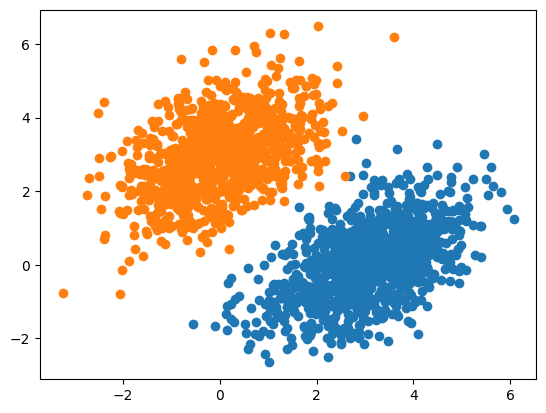

In [95]:
plt.scatter(x=pos_samples[:, 0], y=pos_samples[:, 1])
plt.scatter(x=neg_samples[:, 0], y=neg_samples[:, 1])

**Classifier**

In [96]:
class LinearClassifier:
    def __init__(self, inputs, targets, input_dim, output_dim):
        self.w = tf.Variable(tf.random.uniform((input_dim, output_dim)))
        self.b = tf.Variable(tf.zeros((output_dim,)))
        self.learning_rate = 0.1
        self.targets = targets
        self.inputs = inputs

    def fit(self):
        # ------------------------------------
        # Forward Propagation
        # ------------------------------------
        with tf.GradientTape() as tape:
            # Find prediction (no activation function is used)
            predicted_targets = tf.matmul(self.inputs, self.w) + self.b
            # Find loss (Mean Squared Error)
            predicted_loss = tf.reduce_mean(tf.square(self.targets - predicted_targets))
        # ------------------------------------
        # Backward Propagation
        # ------------------------------------
        # Find gradient
        gradient_w, gradient_b = tape.gradient(predicted_loss, [self.w, self.b])
        # Update weight and bias
        self.w.assign_sub(self.learning_rate * gradient_w)
        self.b.assign_sub(self.learning_rate * gradient_b)
        return predicted_loss

    def predict(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def label(self, values):
        labels = []
        for value in values.numpy():
            labels.append("Positive" if value > 0.5 else "Negative")
        return labels

    def parameters(self):
        print(self.w.numpy())
        print(self.b.numpy())


lc = LinearClassifier(samples, targets, input_dim, output_dim)

**Training**

In [97]:
# Always Random
print("Parameters before training: ")
lc.parameters()

print("Loss during training: ")
for epoch in range(100):
    loss = lc.fit()
    print(loss.numpy(), end=", ")

# Always stable
print()
print("Loss after training: ")
print(loss.numpy())

print("Parameters after training: ")
lc.parameters()

Parameters before training: 
[[0.23846567]
 [0.87068737]]
[0.]
Loss during training: 
4.4894285, 0.4538473, 0.17476188, 0.12560378, 0.11153972, 0.103316635, 0.09649993, 0.09037887, 0.084804855, 0.079717174, 0.0750716, 0.07082944, 0.06695566, 0.06341825, 0.060187962, 0.057238184, 0.054544523, 0.052084774, 0.049838584, 0.047787447, 0.045914397, 0.044203993, 0.042642105, 0.041215837, 0.03991341, 0.038724076, 0.037638005, 0.03664624, 0.0357406, 0.03491359, 0.034158383, 0.033468757, 0.03283901, 0.03226395, 0.031738818, 0.03125928, 0.030821385, 0.030421516, 0.030056363, 0.029722916, 0.029418424, 0.02914037, 0.02888646, 0.028654598, 0.028442867, 0.02824952, 0.028072964, 0.02791174, 0.027764512, 0.027630068, 0.027507296, 0.027395189, 0.027292814, 0.027199326, 0.027113957, 0.027036004, 0.026964817, 0.02689981, 0.026840447, 0.02678624, 0.026736744, 0.02669154, 0.026650261, 0.02661257, 0.026578147, 0.026546719, 0.026518019, 0.026491806, 0.026467869, 0.026446017, 0.026426056, 0.02640783, 0.0263911

**Prediction**

['Positive', 'Positive', 'Positive']
['Negative', 'Negative', 'Negative']


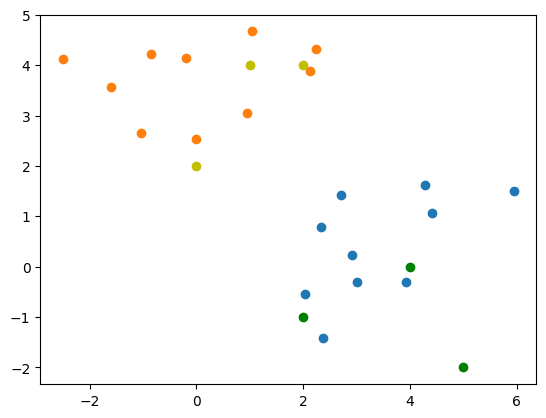

In [98]:
n_subset = 10

plt.scatter(x=pos_samples[:n_subset, 0], y=pos_samples[:n_subset, 1])
plt.scatter(x=neg_samples[:n_subset, 0], y=neg_samples[:n_subset, 1])
plt.scatter(x=pos_test_samples[:, 0], y=pos_test_samples[:, 1], c="g")
plt.scatter(x=neg_test_samples[:, 0], y=neg_test_samples[:, 1], c="y")

print(lc.label(lc.predict(pos_test_samples)))
print(lc.label(lc.predict(neg_test_samples)))

# Keras Linear Classifier

**General:**
- Layer encapsulates state (weight) and function (forward propagation)
- When implementing own layer, put the forward propagation in the call method

**Rank with layers:**
- 2: Dense
- 3: LSTM
- 3: Conv1D
- 4: Conv2D

**Optimizers (tf.keras.optimizers):**
1. SGD (with / without momentum)
2. RMSProp
3. Adam
4. Adagrad

**Loss Functions (tf.keras.losses):**
1. CategoricalCrossEntropy
2. SparseCategoricalCrossentropy
3. BinaryCrossEntropy
4. MeanSquaredError

**Metrics (tf.keras.metrics):**
1. CategoricalAccuracy
2. SparseCategoricalAccuracy
3. BinaryAccuracy
4. AUC
5. Precision
6. Recall

**Dataset**

In [99]:
indices_permutation = np.random.permutation(len(samples))
num_validation_samples = int(0.3 * len(samples))

# Shuffled Dataset
shuffled_samples = samples[indices_permutation]
shuffled_targets = targets[indices_permutation]

# Validation Dataset
validation_samples = shuffled_samples[:num_validation_samples]
validation_targets = shuffled_targets[:num_validation_samples]

# Training Dataset
training_samples = shuffled_samples[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

**Classifier V1**

In [100]:
class KerasLinearClassifierV1:
    def __init__(self, input_size, output_size):
        self.w = tf.Variable(tf.random.uniform(shape=(input_size, output_size)))
        self.b = tf.Variable(tf.zeros(shape=(output_size,)))
        self.optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)
        self.mse = tf.keras.losses.MeanSquaredError()

    def fit(self, inputs, labels):
        # ------------------------------------
        # Forward Propagation
        # ------------------------------------
        with tf.GradientTape() as tape:
            # Activations
            labels_predict = tf.matmul(inputs, self.w) + self.b
            # Mean Square Error
            loss = self.mse(labels, labels_predict)
        # ------------------------------------
        # Backward Propagation
        # ------------------------------------
        gradient = tape.gradient(loss, [self.w, self.b])
        self.optimizer.apply_gradients(zip(gradient, [self.w, self.b]))
        return loss

    def predict(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

**Classifier V2**

In [101]:
class KerasLinearClassifierV2:
    def __init__(self):
        self.model = tf.keras.Sequential(
            tf.keras.layers.Dense(units=1, activation=None)
        )
        self.model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
            metrics=[tf.keras.metrics.BinaryAccuracy()],
        )

    def fit(self, inputs, labels, val_inputs, val_labels, epoch):
        self.history = self.model.fit(
            inputs,
            labels,
            epochs=epoch,
            batch_size=16,
            validation_data=(val_inputs, val_labels),
            verbose=False,
        )

    def evaluate(self, x, y):
        metrics_label = self.model.metrics_names
        metrics_value = self.model.evaluate(x=x, y=y)
        for label, value in zip(metrics_label, metrics_value):
            print("{}: {}".format(label, value))

    def predict(self, x):
        self.model.predict(x)

**Prediction V1**

In [102]:
lc_kerasv1 = KerasLinearClassifierV1(input_dim, output_dim)
for epoch in range(100):
    loss = lc_kerasv1.fit(training_samples, training_targets)
print("w after training: ", lc_kerasv1.w.numpy())
print("b after training: ", lc_kerasv1.b.numpy())
print("loss after training: ", loss.numpy())

w after training:  [[ 0.2031413 ]
 [-0.09753127]]
b after training:  [0.53647304]
loss after training:  0.075207785


**Prediction V2**

In [103]:
lc_kerasv2 = KerasLinearClassifierV2()
lc_kerasv2.fit(
    training_samples,
    training_targets,
    validation_samples,
    validation_targets,
    epoch=100,
)
lc_kerasv2.evaluate(validation_samples, validation_targets)
lc_kerasv2.predict(pos_test_samples)

19/19 [==============================] - 0s 286us/step - loss: 0.0520 - binary_accuracy: 0.9900
loss: 0.05195244401693344
binary_accuracy: 0.9900000095367432


1/1 [==============================] - 0s 14ms/step
